In [1]:
import random
import time
import astropy.io.fits as fits
import astropy.wcs as wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

# Deep COSMOS

In [2]:
datadir='../../doc/20170617_Stacking/maps/hsccats/'

field = 'D_COSMOS'
# df = pd.read_csv(datadir + field + '.csv', skiprows=lambda i: i>0 and random.random() > 1)
df = pd.read_csv(datadir + field + '.csv')
df.rename(columns={"# ra": "ra"}, inplace = True)

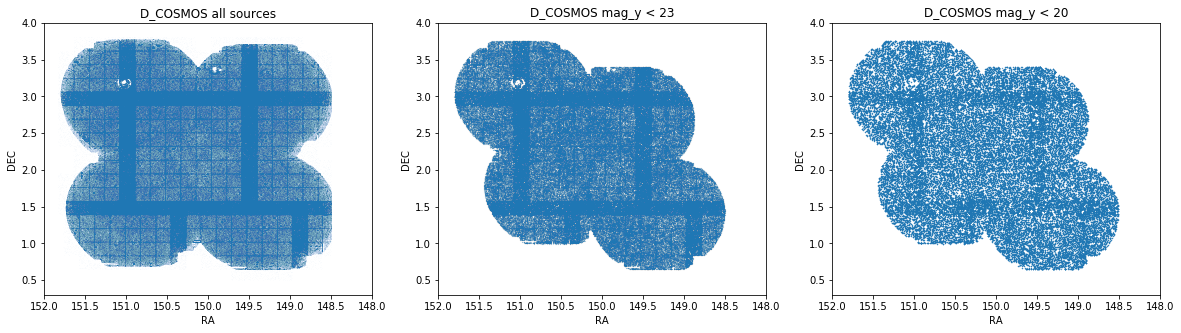

In [3]:
#
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].scatter(df['ra'], df['dec'], s=0.00002)
ax[0].set_xlabel('RA')
ax[0].set_ylabel('DEC')
ax[0].set_title(field + ' all sources')
ax[0].set_xlim([148,152])
ax[0].set_ylim([0.3,4])
ax[0].invert_xaxis()

ax[1].scatter(df['ra'][(df['ymag_psf']<23)], df['dec'][(df['ymag_psf']<23)], s=0.002)
ax[1].set_xlabel('RA')
ax[1].set_ylabel('DEC')
ax[1].set_title(field + ' mag_y < 23')
ax[1].set_xlim([148,152])
ax[1].set_ylim([0.3,4])
ax[1].invert_xaxis()

ax[2].scatter(df['ra'][(df['ymag_psf']<20)], df['dec'][(df['ymag_psf']<20)], s=0.1)
ax[2].set_xlabel('RA')
ax[2].set_ylabel('DEC')
ax[2].set_title(field + ' mag_y < 20')
ax[2].set_xlim([148,152])
ax[2].set_ylim([0.3,4])
ax[2].invert_xaxis()
fig.savefig(field + '_map', dpi = 256, bbox_inches='tight')

# Wide XMM

In [4]:
datadir='../../doc/20170617_Stacking/maps/hsccats/'

field = 'XMM'
df = pd.read_csv(datadir + field + '.csv')
df.rename(columns={"# ra": "ra"}, inplace = True)

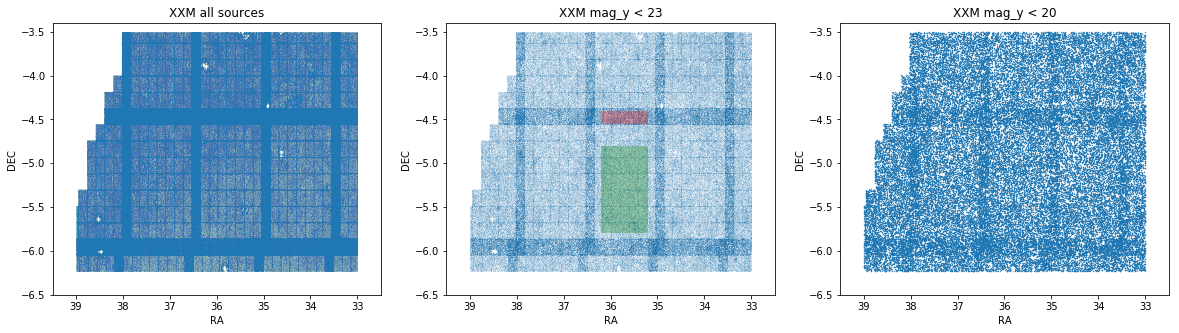

In [6]:
#
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].scatter(df['ra'], df['dec'], s=0.00001)
ax[0].set_xlabel('RA')
ax[0].set_ylabel('DEC')
ax[0].set_title(field + ' all sources')
ax[0].set_xlim([32.5,39.5])
ax[0].set_ylim([-6.5,-3.4])
ax[0].invert_xaxis()

ax[1].scatter(df['ra'][(df['ymag_psf']<23)], df['dec'][(df['ymag_psf']<23)], s=0.0001)
ax[1].set_xlabel('RA')
ax[1].set_ylabel('DEC')
ax[1].set_title(field + ' mag_y < 23')
ax[1].set_xlim([32.5,39.5])
ax[1].set_ylim([-6.5,-3.4])
ax[1].invert_xaxis()
ax[1].broken_barh([(35.2,1)],(-5.8,1), facecolors='green', alpha=0.3)
ax[1].broken_barh([(35.2,1)],(-4.55,0.15), facecolors='red', alpha=0.3)

ax[2].scatter(df['ra'][(df['ymag_psf']<20)], df['dec'][(df['ymag_psf']<20)], s=0.05)
ax[2].set_xlabel('RA')
ax[2].set_ylabel('DEC')
ax[2].set_title(field + ' mag_y < 20')
ax[2].set_xlim([32.5,39.5])
ax[2].set_ylim([-6.5,-3.4])
ax[2].invert_xaxis()
fig.savefig(field + '_map', dpi = 256, bbox_inches='tight')

In [7]:
df1 = df[(df['ra'] < 36.2) & (df['ra'] > 35.2) & (df['dec'] < -4.8) & (df['dec'] > -5.8)]
df2 = df[(df['ra'] < 36.2) & (df['ra'] > 35.2) & (df['dec'] < -4.4) & (df['dec'] > -4.55)]
area1 = 1 * 1
area2 = 1 * 0.15

dfname='../../doc/20170617_Stacking/maps/catcoord/TM1/PanSTARRS/SWIRE.txt'
dfps = pd.read_csv(dfname)

helgdir = '/Users/ytcheng/ciber/doc/20170904_External/helgason/'
helgdat = np.loadtxt(helgdir + 'Helgason125.txt', skiprows=1, delimiter=',')

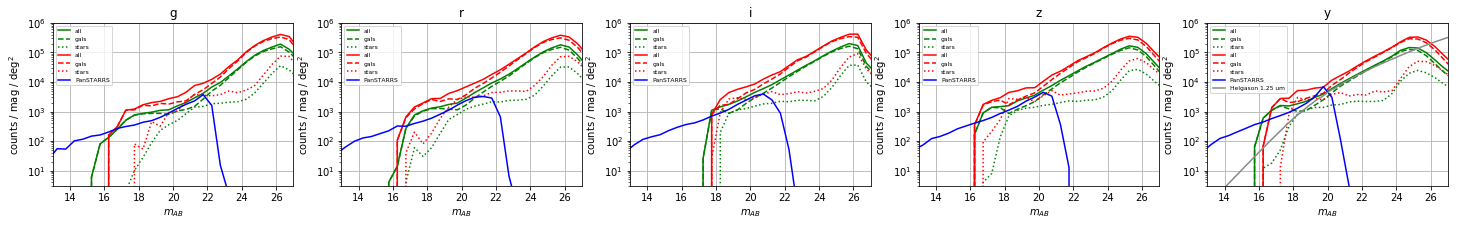

In [9]:
#
binedges = np.arange(7,29,0.5)
bins = (binedges[:-1] + binedges[1:])/2

fig, ax = plt.subplots(1,5,figsize=(25,3))

for iband,band in enumerate(['g','r','i','z','y']):
    d = df1[band + 'mag_psf']
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area1,'g-',label='all')
    d = df1[band + 'mag_psf'][df1[band + 'cls']==1]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area1,'g--',label='gals')
    d = df1[band + 'mag_psf'][df1[band + 'cls']==0]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area1,'g:',label='stars')
    
    d = df2[band + 'mag_psf']
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area2,'r-',label='all')
    d = df2[band + 'mag_psf'][df2[band + 'cls']==1]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area2,'r--',label='gals')
    d = df2[band + 'mag_psf'][df2[band + 'cls']==0]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area2,'r:',label='stars')
    
    d = dfps[band+'MeanPSFMag'][(dfps['x'] > -0.5) & (dfps['y'] > -0.5)\
                                & (dfps['x'] < 1023.5) & (dfps['y'] < 1023.5)]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / 4,'b-',label='PanSTARRS')
    
    if band == 'y':
        ax[iband].plot(helgdat[:,0],helgdat[:,1], '-', c = '#838B8B', label = 'Helgason 1.25 um')

    ax[iband].set_title(band)
    ax[iband].set_xlim([13,27])
    ax[iband].set_ylim([3e0,1e6])
    ax[iband].set_yscale('log')
    ax[iband].set_xlabel('$m_{AB}$')
    ax[iband].set_ylabel('counts / mag / deg$^2$')
    ax[iband].legend(fontsize=6)
    ax[iband].grid()
fig.savefig(field + '_mfunc', dpi = 256, bbox_inches='tight')

In [10]:
dfs = df[(df['ra'] < 35.3) & (df['ra'] > 35.2) & (df['dec'] < -4.4) & (df['dec'] > -4.5)\
         & (df['ymag_psf'] < 19.5) & (df['ymag_psf'] > 18)]
dfs = dfs.iloc[np.argsort(np.array(dfs['ymag_psf']))].head(15)

In [11]:
dfs.iloc[np.argsort(np.array(dfs['ymag_psf']))].head(15)

,ra,dec,gmag_psf,rmag_psf,imag_psf,zmag_psf,ymag_psf,gcls,rcls,icls,zcls,ycls,photz,photz_risk,specz,specz_err
9195639,35.261271,-4.419309,20.738743,19.425156,18.535986,18.158108,18.000786,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
9207627,35.261271,-4.419309,20.738764,19.425236,18.535986,18.158110,18.000812,0.0,0.0,0.0,0.0,0.0,0.29,0.178937,NaN,NaN
4286362,35.261268,-4.419308,20.738356,19.423285,18.538179,18.157955,18.001776,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4298384,35.261268,-4.419308,20.738375,19.423399,18.538179,18.157957,18.001804,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4286643,35.287039,-4.405888,19.899458,18.071512,23.575373,21.160999,18.096460,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4294300,35.243174,-4.454717,20.481157,19.193794,18.489563,18.234249,18.110611,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
9203568,35.243178,-4.454717,20.480995,19.197678,18.487845,18.234436,18.111340,0.0,0.0,0.0,0.0,0.0,0.25,0.059526,NaN,NaN
4285683,35.293325,-4.434053,19.535923,18.474873,18.530609,18.123402,18.114971,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
9194961,35.293328,-4.434054,19.534798,18.479298,18.528145,18.123631,18.115669,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4296939,35.293325,-4.434055,19.580694,18.525028,18.552772,18.145002,18.131851,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


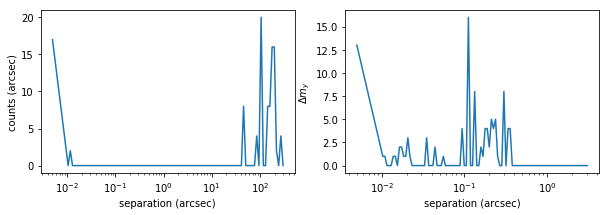

In [14]:
#
d = []
myd = []
coord = SkyCoord(ra=dfs['ra']*u.degree, dec=(dfs['dec']+40)*u.degree,frame='icrs')
my = np.array(dfs['ymag_psf'])
ra = np.array(dfs['ra'])*3600
dec = np.array(dfs['dec']+40)*3600
decrad = dec/3600/180*np.pi
for i in range(len(dfs)-1):    
    di = np.sqrt(((ra[i]-ra)*np.cos((decrad[i]+decrad)/2))**2 + (dec[i] - dec)**2)
    di = di[i+1:]
    d = np.concatenate((d,di))
    myd = np.concatenate((myd, abs(my[i]-my[i+1:])))

fig, ax = plt.subplots(1,2,figsize=(10,3))

binedges = np.concatenate(([-1e-8],np.logspace(-2,2.5,100)))
bins = (binedges[1:]+binedges[:-1])/2
h,_ = np.histogram(d, bins = binedges)
ax[0].plot(bins,h)
ax[0].set_xscale('log')
ax[0].set_xlabel('separation (arcsec)')
ax[0].set_ylabel('counts (arcsec)')

binedges = np.concatenate(([-1e-8],np.logspace(-2,0.5,100)))
bins = (binedges[1:]+binedges[:-1])/2
h,_ = np.histogram(myd, bins = binedges)
ax[1].plot(bins,h)
ax[1].set_xscale('log')
ax[1].set_xlabel('separation (arcsec)')
ax[1].set_ylabel(r'$\Delta m_y$')
fig.savefig(field + '_sep_example', dpi = 256, bbox_inches='tight')

In [52]:
#
start_time = time.time()

# dfs = df[(df['ra'] < 37.2) & (df['ra'] > 33.2) & (df['dec'] < -4.2) & (df['dec'] > -6.5)\
#          & (df['ymag_psf'] < 22)]
dfs = df[df['ymag_psf'] < 22]
# dfs = df.copy()

ra_arr = np.array(dfs['ra'])*3600
dec_arr = np.array(dfs['dec'])*3600
gcls_arr = np.array(dfs['gcls'])
Nnan_arr = np.array(dfs.isnull().sum(axis=1))
idx_arr = np.arange(len(dfs))
idx_use = []
while len(idx_arr) > 0:
    idxi = idx_arr[0]
    sp = np.where((abs(ra_arr[0] - ra_arr)<0.2) & (abs(dec_arr[0] - dec_arr)<0.1) \
                  & (gcls_arr[0]==gcls_arr))[0]
    if len(sp)==0:
        sp = np.array([0])
    idxs = idx_arr[sp]
    ras = ra_arr[sp]
    decs = dec_arr[sp]
    decrads = decs/3600/180*np.pi
    ds = np.sqrt(((ras[0]-ras)*np.cos((decrads[0]+decrads)/2))**2 + (decs[0] - decs)**2)
    sp1 = np.where(ds<0.1)[0]
    idxs = idxs[sp1]
    if len(idxs) == 1:
        idx_use.append(int(idxs))
    else:
        idx_use.append(idxs[np.argmin(Nnan_arr[sp[sp1]])])
    
    idx_arr = np.delete(idx_arr,sp[sp1])
    ra_arr = np.delete(ra_arr,sp[sp1])
    dec_arr = np.delete(dec_arr,sp[sp1])
    Nnan_arr = np.delete(Nnan_arr,sp[sp1])
    gcls_arr = np.delete(gcls_arr,sp[sp1])

print('df length = %d, time = %.2f min'%(len(dfs),(time.time()-start_time)/60))

tried run for the full catalog, and it wasn't finished after 12 hrs

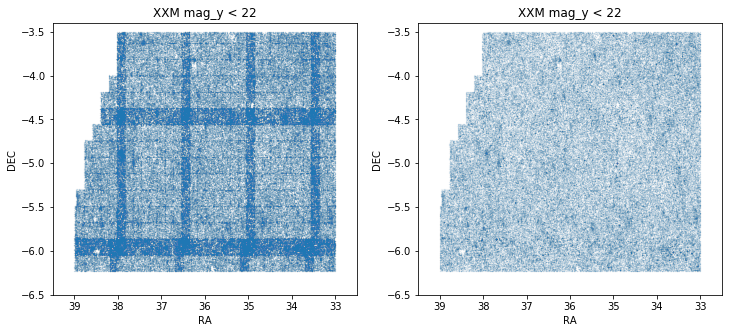

In [27]:
#
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dfs['ra'], dfs['dec'], s=0.0005)
ax[0].set_xlabel('RA')
ax[0].set_ylabel('DEC')
ax[0].set_title(field + ' mag_y < 22')
ax[0].set_xlim([32.5,39.5])
ax[0].set_ylim([-6.5,-3.4])
ax[0].invert_xaxis()

ax[1].scatter(dfs.iloc[idx_use]['ra'], dfs.iloc[idx_use]['dec'], s=0.0005)
ax[1].set_xlabel('RA')
ax[1].set_ylabel('DEC')
ax[1].set_title(field + ' mag_y < 22')
ax[1].set_xlim([32.5,39.5])
ax[1].set_ylim([-6.5,-3.4])
ax[1].invert_xaxis()

fig.savefig(field + '_map_clean', dpi = 256, bbox_inches='tight')

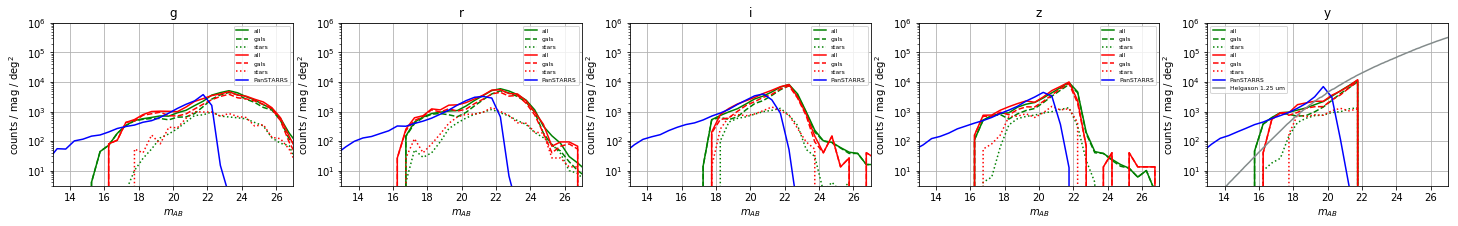

In [28]:
#
dfsc = dfs.iloc[idx_use]
df1 = dfsc[(dfsc['ra'] < 36.2) & (dfsc['ra'] > 35.2) & (dfsc['dec'] < -4.8) & (dfsc['dec'] > -5.8)]
df2 = dfsc[(dfsc['ra'] < 36.2) & (dfsc['ra'] > 35.2) & (dfsc['dec'] < -4.4) & (dfsc['dec'] > -4.55)]
area1 = 1 * 1
area2 = 1 * 0.15

binedges = np.arange(7,29,0.5)
bins = (binedges[:-1] + binedges[1:])/2

fig, ax = plt.subplots(1,5,figsize=(25,3))

for iband,band in enumerate(['g','r','i','z','y']):
    d = df1[band + 'mag_psf']
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area1,'g-',label='all')
    d = df1[band + 'mag_psf'][df1[band + 'cls']==1]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area1,'g--',label='gals')
    d = df1[band + 'mag_psf'][df1[band + 'cls']==0]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area1,'g:',label='stars')
    
    d = df2[band + 'mag_psf']
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area2,'r-',label='all')
    d = df2[band + 'mag_psf'][df2[band + 'cls']==1]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area2,'r--',label='gals')
    d = df2[band + 'mag_psf'][df2[band + 'cls']==0]
    d = d[(~np.isnan(d)) & (np.isfinite(d))]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / area2,'r:',label='stars')
    
    d = dfps[band+'MeanPSFMag'][(dfps['x'] > -0.5) & (dfps['y'] > -0.5)\
                                & (dfps['x'] < 1023.5) & (dfps['y'] < 1023.5)]
    shist,_ = np.histogram(d, bins = binedges)
    ax[iband].plot(bins,shist / (binedges[1]-binedges[0]) / 4,'b-',label='PanSTARRS')
    
    if band == 'y':
        ax[iband].plot(helgdat[:,0],helgdat[:,1], '-', c = '#838B8B', label = 'Helgason 1.25 um')

    ax[iband].set_title(band)
    ax[iband].set_xlim([13,27])
    ax[iband].set_ylim([3e0,1e6])
    ax[iband].set_yscale('log')
    ax[iband].set_xlabel('$m_{AB}$')
    ax[iband].set_ylabel('counts / mag / deg$^2$')
    ax[iband].legend(fontsize=6)
    ax[iband].grid()
fig.savefig(field + '_mfunc_clean', dpi = 256, bbox_inches='tight')